# Library

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")

# install extra lib
from imblearn.over_sampling import SMOTE

# Scale
from sklearn.preprocessing import MinMaxScaler

# Split data
from sklearn.model_selection import train_test_split

# Model Logistic
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

# XGBoost
import xgboost as xgb

# Load data

In [8]:
df_loan = pd.read_csv("loan_data.csv")
df_loan

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,credit_card,0.143,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.000,0,0
1,1,home_improvement,0.110,870.29,55000.0,30.13,734,35947,11898,0.476,2,1.000,0,0
2,1,credit_card,0.088,785.32,165000.0,16.11,694,36373,20681,0.567,0,0.000,0,0
3,1,credit_card,0.170,285.03,40000.0,32.07,744,40269,8514,0.226,2,0.000,0,0
4,1,debt_consolidation,0.088,570.81,36000.0,23.73,714,38565,7555,0.256,1,0.000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37061,1,debt_consolidation,0.088,792.79,167000.0,24.66,694,37895,0,0.000,25987,0.680,0,1
37062,1,debt_consolidation,0.103,856.40,125000.0,11.73,744,31444,0,0.000,1728,0.033,0,1
37063,1,small_business,0.180,837.45,75000.0,9.02,694,40878,3,0.000,636,0.038,0,1
37064,1,debt_consolidation,0.110,458.48,32072.0,58.12,779,39539,0,0.000,15016,0.289,0,1


## EDA : Check data

In [9]:
df_loan.count()

credit_policy        37066
purpose              37066
int_rate             37066
installment          37066
log_annual_inc       37066
dti                  36966
fico                 37066
days_with_cr_line    37066
revol_bal            37066
revol_util           37054
inq_last_6mths       37066
delinq_2yrs          37032
pub_rec              37066
not_fully_paid       37066
dtype: int64

In [10]:
# Check row null
df_loan[df_loan.isna().any(axis=1)]

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
251,1,credit_card,0.143,1201.33,0.0,NaN,679,42156,16858,0.371,1,0.000,2,1
1554,1,credit_card,0.088,826.66,0.0,NaN,709,38353,47472,0.682,1,0.000,0,0
1805,1,debt_consolidation,0.124,167.03,38000.0,5.56,689,39052,0,NaN,0,0.000,0,0
2226,1,home_improvement,0.082,814.70,120000.0,9.25,764,37987,0,NaN,0,0.000,0,0
2345,1,debt_consolidation,0.131,797.80,0.0,NaN,814,37316,97,0.016,0,0.000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35967,1,house,0.082,1256.97,0.0,NaN,709,31686,0,0.000,278568,0.544,0,1
35969,1,home_improvement,0.139,928.66,1.0,NaN,709,33848,0,0.000,1648,0.323,0,1
36356,1,debt_consolidation,0.250,59.64,60000.0,9.40,719,39234,0,0.000,0,NaN,0,1
36503,1,credit_card,0.065,1225.24,0.0,NaN,739,30864,0,0.000,55481,0.937,0,1


In [22]:
# Drop row nan
loandata = df_loan.dropna()

not_fully_paid
1    26775
0    10145
Name: count, dtype: int64


<Axes: xlabel='not_fully_paid'>

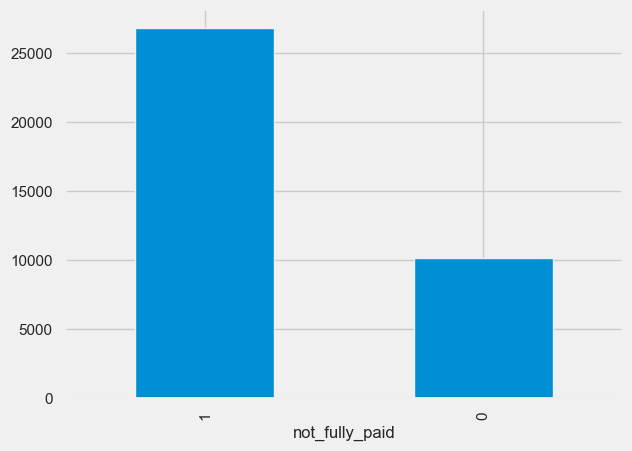

In [23]:
# Thống kê khoản vay có hoàn trả trả phí hay không
# 0: khoản vay không được hoàn trả đầy đủ
# 1: khoản vay được hoàn trả phí đầy đủ

print(loandata.not_fully_paid.value_counts())
loandata["not_fully_paid"].value_counts().plot(kind='bar')

# Pre-processing data

In [24]:
# Tìm các field là Object/String
object_cols = [f for f in loandata.columns if loandata[f].dtype == "O"]
print(object_cols)

['purpose']


In [28]:
# Xử lí cột purpose
loandata.purpose.value_counts()

purpose
debt_consolidation    19516
credit_card            9087
home_improvement       2836
other                  2496
major_purchase          899
medical                 465
house                   406
car                     384
vacation                313
small_business          269
moving                  234
renewable_energy         15
Name: count, dtype: int64

In [ ]:
def ProcessPurpose(x):
    if x == "debt_consolidation":
        return 1
    else:
        return 0

loandata["purpose_int"] = loandata["purpose"].apply(ProcessPurpose)

In [27]:
loandata["purpose_int"].value_counts()

purpose_int
1    19516
0    17404
Name: count, dtype: int64

In [29]:
# Drop purpose and view
loandata.drop(columns="purpose", inplace=True)
loandata.head()

C:\Users\asus\AppData\Local\Temp\ipykernel_5384\1434709818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loandata.drop(columns="purpose", inplace=True)


,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_int
0,1,0.143,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.0,0,0,0
1,1,0.110,870.29,55000.0,30.13,734,35947,11898,0.476,2,1.0,0,0,0
2,1,0.088,785.32,165000.0,16.11,694,36373,20681,0.567,0,0.0,0,0,0
3,1,0.170,285.03,40000.0,32.07,744,40269,8514,0.226,2,0.0,0,0,0
4,1,0.088,570.81,36000.0,23.73,714,38565,7555,0.256,1,0.0,0,1,1


In [ ]:
# Check column credit_policy
loandata["credit_policy"].value_counts()

In [38]:
# Drop credit_policy because full = 1
loandata.drop(columns="credit_policy", inplace=True)
loandata.head()

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_int
0,0.143,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.0,0,0,0
1,0.110,870.29,55000.0,30.13,734,35947,11898,0.476,2,1.0,0,0,0
2,0.088,785.32,165000.0,16.11,694,36373,20681,0.567,0,0.0,0,0,0
3,0.170,285.03,40000.0,32.07,744,40269,8514,0.226,2,0.0,0,0,0
4,0.088,570.81,36000.0,23.73,714,38565,7555,0.256,1,0.0,0,1,1


In [39]:
# Check corr để xem có bỏ field nào đi không? -> Kiểm tra thử có cột nào quá phụ thuộc nhau không -> Không thấy 2 cột input nào quá corr -> Giữ lại toàn bộ input
corr = loandata.corr()
corr.style.background_gradient(cmap='coolwarm')


,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_int
int_rate,1.000000,0.042739,-0.055919,0.116065,-0.456244,0.086726,0.021824,0.133468,-0.003504,0.172759,0.046075,-0.036599,0.097478
installment,0.042739,1.000000,0.227242,0.084286,0.022387,-0.125390,0.170643,0.028539,0.226005,0.046695,-0.049956,-0.013016,0.140044
log_annual_inc,-0.055919,0.227242,1.000000,-0.121779,0.020853,-0.119594,0.151355,0.044720,0.177392,0.029868,-0.034424,-0.037026,-0.002927
dti,0.116065,0.084286,-0.121779,1.000000,-0.013244,-0.044598,0.077765,0.000342,0.081434,0.032497,-0.010775,-0.031361,0.054696
fico,-0.456244,0.022387,0.020853,-0.013244,1.000000,-0.120728,-0.021722,-0.188516,-0.065700,-0.307689,-0.191167,-0.027124,-0.024893
days_with_cr_line,0.086726,-0.125390,-0.119594,-0.044598,-0.120728,1.000000,-0.066180,-0.068710,-0.187349,-0.052515,-0.006409,-0.038029,-0.006357
revol_bal,0.021824,0.170643,0.151355,0.077765,-0.021722,-0.066180,1.000000,0.128898,-0.203446,-0.146972,-0.067585,-0.356469,0.029699
revol_util,0.133468,0.028539,0.044720,0.000342,-0.188516,-0.068710,0.128898,1.000000,-0.061745,-0.014098,-0.052424,-0.086816,0.004182
inq_last_6mths,-0.003504,0.226005,0.177392,0.081434,-0.065700,-0.187349,-0.203446,-0.061745,1.000000,0.220876,-0.056046,0.219629,-0.007000
delinq_2yrs,0.172759,0.046695,0.029868,0.032497,-0.307689,-0.052515,-0.146972,-0.014098,0.220876,1.000000,-0.030163,0.135084,0.007397


C:\Users\asus\AppData\Local\Temp\ipykernel_5384\730625136.py:11: RuntimeWarning: divide by zero encountered in log10
  scores = -np.log10(selector.pvalues_)


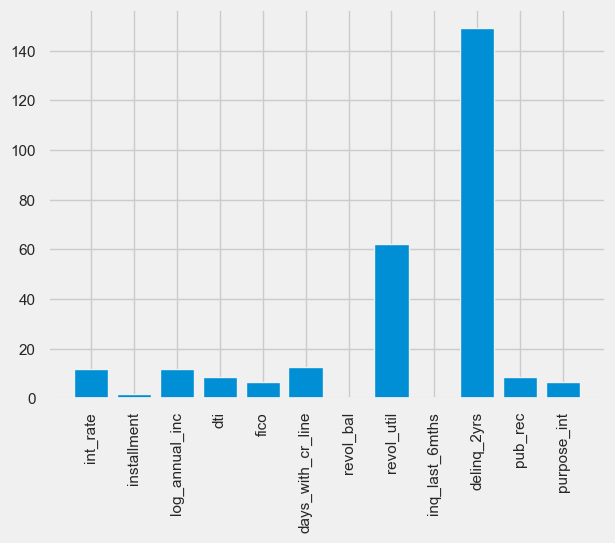

In [71]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

predictors = loandata.drop(columns=["not_fully_paid"]).columns.values

# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(loandata[predictors], loandata["not_fully_paid"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores.
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()


In [45]:
# Scale dữ liệu
features = loandata.drop(columns="not_fully_paid").columns.values

X = loandata[features]
y = loandata["not_fully_paid"]

sacler = MinMaxScaler()
sacler.fit(X[features])
X[features] = sacler.transform(X[features])

C:\Users\asus\AppData\Local\Temp\ipykernel_5384\600906248.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[features] = sacler.transform(X[features])


In [46]:
X.head()

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,purpose_int
0,0.352941,0.285030,0.016129,0.015716,0.161290,0.760027,0.039118,0.029304,0.000005,0.333333,0.0,0.0
1,0.223529,0.511634,0.005914,0.030160,0.376344,0.666667,0.023568,0.020696,0.000003,0.066667,0.0,0.0
2,0.137255,0.459866,0.017742,0.016126,0.161290,0.687403,0.040966,0.024652,0.000000,0.000000,0.0,0.0
3,0.458824,0.155066,0.004301,0.032102,0.430108,0.877044,0.016865,0.009826,0.000003,0.000000,0.0,0.0
4,0.137255,0.329176,0.003871,0.023754,0.268817,0.794100,0.014965,0.011130,0.000002,0.000000,0.0,1.0


In [60]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model 1st with Logistic Regression(not good for data Imbalance), Upsampling by SMOTE

In [61]:
y_train.value_counts()

not_fully_paid
1    21484
0     8052
Name: count, dtype: int64

In [62]:
# Upsampling
sm = SMOTE(k_neighbors=5)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [63]:
y_train_resampled.value_counts()

not_fully_paid
1    21484
0    21484
Name: count, dtype: int64

              precision    recall  f1-score   support

           0       0.68      0.69      0.68      2093
           1       0.88      0.87      0.87      5291

    accuracy                           0.82      7384
   macro avg       0.78      0.78      0.78      7384
weighted avg       0.82      0.82      0.82      7384



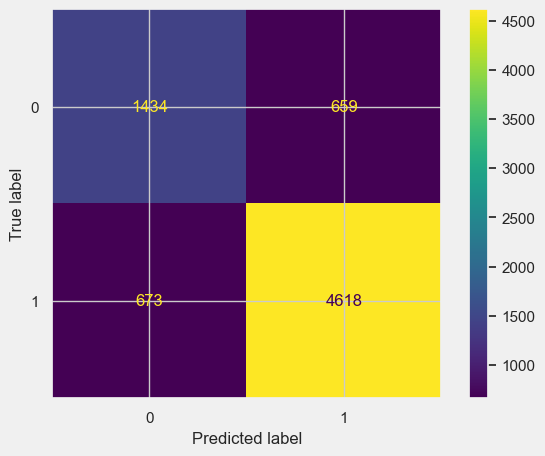

In [64]:
# Logistic Regression
model_log = LogisticRegression()
model_log.fit(X_train_resampled, y_train_resampled)
y_pred = model_log.predict(X_test)

# Print data
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [68]:
from sklearn.model_selection import GridSearchCV

# Grid search tìm tham số
params_grid_logistic={"C":[0.01, 0.1, 1, 10, 100, 1000], "penalty":["l1", "l2"]}# l1 lasso l2 ridge

grid_logistic= GridSearchCV( LogisticRegression(solver='lbfgs', max_iter=1000) ,params_grid_logistic, cv=10)
grid_logistic.fit(X_train_resampled, y_train_resampled)

print("tuned hpyerparameters :(best parameters) ",grid_logistic.best_params_)
print('\033[1m' + "accuracy :",grid_logistic.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000, 'penalty': 'l2'}
accuracy : 0.7938236054429729


K:\Python\LoanRepayment\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "K:\Python\LoanRepayment\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "K:\Python\LoanRepayment\.venv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "K:\Python\LoanRepayment\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, 

              precision    recall  f1-score   support

           0       0.73      0.67      0.70      2093
           1       0.87      0.90      0.89      5291

    accuracy                           0.84      7384
   macro avg       0.80      0.78      0.79      7384
weighted avg       0.83      0.84      0.83      7384



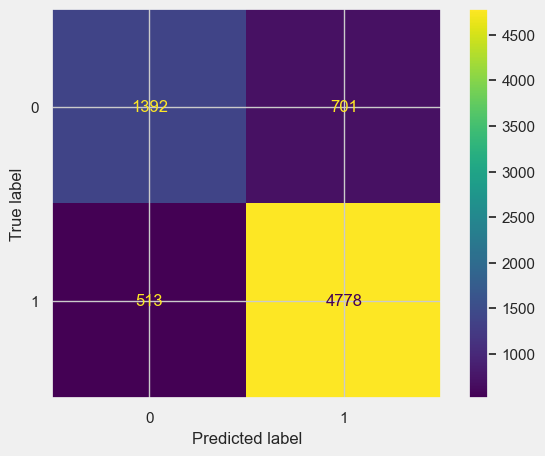

In [69]:
y_pred = grid_logistic.predict(X_test);
# In ra du lieu
print(classification_report( y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# Train model 02 with XGBoost and no Upsampling

              precision    recall  f1-score   support

           0       0.74      0.70      0.72      2093
           1       0.88      0.90      0.89      5291

    accuracy                           0.85      7384
   macro avg       0.81      0.80      0.81      7384
weighted avg       0.84      0.85      0.84      7384



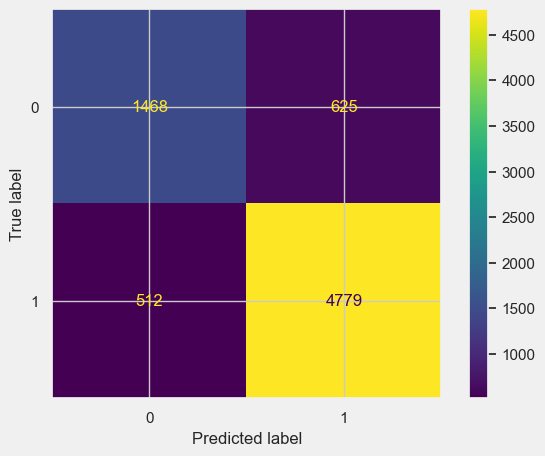

In [66]:
model_xgb = xgb.XGBClassifier(random_state=42, n_estimators=20)
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)

# Print report
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

0.80231


C:\Users\asus\AppData\Local\Temp\ipykernel_5384\3254577035.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1],'r--', color="navy")


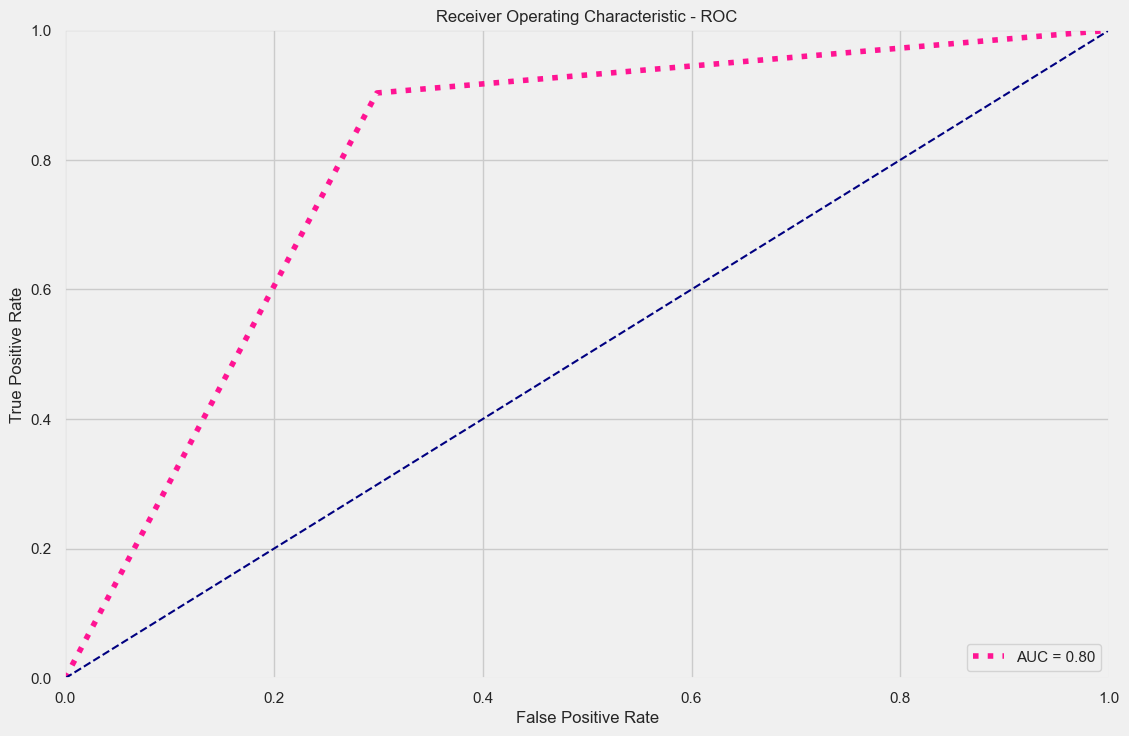

In [67]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_predict

fpr_log_ros, tpr_log_ros, thresholds_log_ros = roc_curve(y_test, y_pred)

auc_log_ros = float("{:.5f}".format(auc(fpr_log_ros, tpr_log_ros)))
print(auc_log_ros)

plt.figure(figsize=(12, 8))
plt.title('Receiver Operating Characteristic - ROC')
plt.plot(fpr_log_ros, tpr_log_ros, ':', linewidth=4, label = 'AUC = %0.2f' % auc_log_ros, color="deeppink", )
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color="navy")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [70]:
#Grid search XGBoost
estimator = xgb.XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (2, 10, 2),
    'n_estimators': range(60, 220, 100),
    'learning_rate': [0.1, 0.01, 0.05]
}


grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

Fitting 10 folds for each of 24 candidates, totalling 240 fits


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=160, n_jobs=None, nthread=4,
              num_parallel_tree=None, ...)